In [9]:
from simulator import TrafficEnv
import torch
from trainer_ppo_class import unpack_obs
import numpy as np

def nearest_neighbor(next_paths, visited):
    next_paths[1-visited] = 1000
    print(next_paths)
    print(visited)
    i = np.argmin(next_paths)
    print('CHOSEN', i)
    return i

def test_nn(n):
    # env = TrafficEnv(trafficmap_dir='traffic_maps', time_per_step=20, max_steps=10)
    total_reward = 0
    for i in range(n):
        total_reward += evaluate_policy(nearest_neighbor)
    return total_reward/n


def evaluate_policy(policy, seed=42):
    env_test = TrafficEnv(trafficmap_dir='traffic_maps', time_per_step=20, max_steps=8)
    
    obs, _ = env_test.reset()
    next_paths = obs[0]
    done = False
    total_reward = 0
    for i in range(env_test.max_steps):
        action = policy(next_paths, obs[1])
        obs, reward, done, _, _ = env_test.step(action)
        
        total_reward += reward
        print(reward, end=' ')
        if done:
            break
    print()
    return total_reward

In [10]:
print(test_nn(100))

[1000.        1000.           2.0202262    3.123021     1.9422922
    1.1989563    2.8654065    2.0770319    2.623417     2.86022  ]
[False  True  True  True  True  True  True  True  True  True]
CHOSEN 5
1 [1000.        1000.           2.0202262    3.123021     1.9422922
  100.           2.8654065    2.0770319    2.623417     2.86022  ]
[False  True  True  True  True False  True  True  True  True]
CHOSEN 4
1 [1000.        1000.           2.0202262    3.123021   100.
  100.           2.8654065    2.0770319    2.623417     2.86022  ]
[False  True  True  True False False  True  True  True  True]
CHOSEN 2
1 [1000.        1000.         100.           3.123021   100.
  100.           2.8654065    2.0770319    2.623417     2.86022  ]
[False  True False  True False False  True  True  True  True]
CHOSEN 7
1 [1000.        1000.         100.           3.123021   100.
  100.           2.8654065  100.           2.623417     2.86022  ]
[False  True False  True False False  True False  True  True]
CH

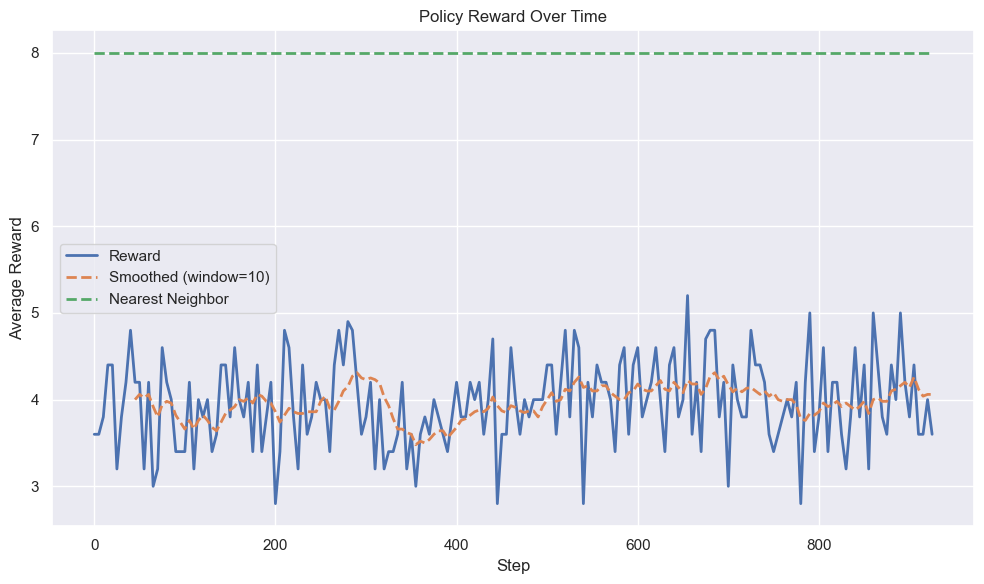

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="darkgrid")

# Load CSV
df = pd.read_csv('output.csv')  # Change path if needed


# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='step', y=' reward', data=df, label='Reward', linewidth=2)

# Optionally smooth the curve with rolling average
df['rolling_reward'] = df[' reward'].rolling(window=10).mean()
sns.lineplot(x='step', y='rolling_reward', data=df, label='Smoothed (window=10)', linewidth=2, linestyle='--')

# Plot nearest Neighbor line
val = 8
rows = [[0, val], [df['step'].iloc[-1], val]]
df2 = pd.DataFrame(rows, columns=['step','reward'])
sns.lineplot(x='step', y='reward', data=df2, label='Nearest Neighbor', linewidth=2, linestyle='--')

# Labels and title
plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.title('Policy Reward Over Time')
plt.legend()
plt.tight_layout()
plt.show()
